In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from model import unet
# from data import *
from customdatagenerator import CustomDataGenerator
from PIL import Image
from utils import *

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

[  0 255]


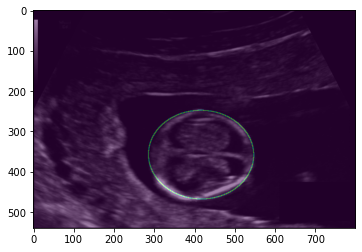

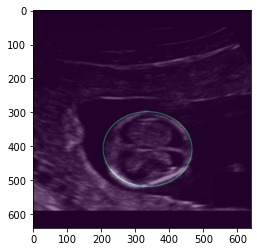

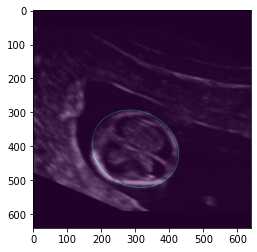

In [37]:
from utils import scale_resize_image, preprocess_images
import matplotlib.pyplot as plt
im = Image.open('G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/Image/003_HC.png')
lbl = Image.open('G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/Annotation/003_HC_Annotation.png')

print(np.unique(lbl))

im1,lbl1 = scale_resize_image(im, lbl,resize=(640,640))
im2,lbl2 = preprocess_images(im,lbl,(640,640))

plt.figure()
plt.imshow(im,cmap='gray')
plt.imshow(lbl,alpha=0.5)
                    
plt.figure()
plt.imshow(im1,cmap='gray')
plt.imshow(lbl1,alpha=0.5)

plt.figure()
plt.imshow(im2,cmap='gray')
plt.imshow(lbl2,alpha=0.5)



### Train with data generator

In [2]:
train_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/'
val_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/'
batch_size = 3
dim = (640,640)
n_channels = 1

# using custom datagenerator:
train_gen = CustomDataGenerator(path = train_path, batch_size = batch_size, dim = dim, n_channels = n_channels, shuffle = True, augmentation = True, resize=dim)
val_gen = CustomDataGenerator(path = val_path, batch_size = batch_size, dim = dim, n_channels = n_channels, shuffle = True, augmentation = True,resize=dim)

model = unet(input_size=(*dim,1))

print(model.summary())
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(train_gen, validation_data=val_gen,epochs=50,callbacks=[model_checkpoint])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 640, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 640, 640, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 640, 640, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

                                6)                                'conv2d_16[0][0]']              
                                                                                                  
 conv2d_17 (Conv2D)             (None, 320, 320, 12  295040      ['concatenate_2[0][0]']          
                                8)                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 320, 320, 12  147584      ['conv2d_17[0][0]']              
                                8)                                                                
                                                                                                  
 up_sampling2d_3 (UpSampling2D)  (None, 640, 640, 12  0          ['conv2d_18[0][0]']              
                                8)                                                                
          

C:\Users\kchan\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


233/233 [==============================] - ETA: 0s - loss: 1.9003 - binary_accuracy: 0.9910 - dice_coeff: 0.0154
Epoch 1: val_loss improved from inf to 1.62947, saving model to unet_membrane.hdf5
233/233 [==============================] - 190s 727ms/step - loss: 1.9003 - binary_accuracy: 0.9910 - dice_coeff: 0.0154 - val_loss: 1.6295 - val_binary_accuracy: 0.9921 - val_dice_coeff: 0.0164
Epoch 2/50
233/233 [==============================] - ETA: 0s - loss: 1.0396 - binary_accuracy: 0.9923 - dice_coeff: 0.0949
Epoch 2: val_loss improved from 1.62947 to 0.97129, saving model to unet_membrane.hdf5
233/233 [==============================] - 174s 748ms/step - loss: 1.0396 - binary_accuracy: 0.9923 - dice_coeff: 0.0949 - val_loss: 0.9713 - val_binary_accuracy: 0.9921 - val_dice_coeff: 0.1032
Epoch 3/50
233/233 [==============================] - ETA: 0s - loss: 0.9310 - binary_accuracy: 0.9923 - dice_coeff: 0.1313
Epoch 3: val_loss did not improve from 0.97129
233/233 [=======================

Epoch 22/50
233/233 [==============================] - ETA: 0s - loss: 0.8059 - binary_accuracy: 0.9791 - dice_coeff: 0.2318
Epoch 22: val_loss did not improve from 0.83935
233/233 [==============================] - 177s 761ms/step - loss: 0.8059 - binary_accuracy: 0.9791 - dice_coeff: 0.2318 - val_loss: 0.8403 - val_binary_accuracy: 0.9752 - val_dice_coeff: 0.1989
Epoch 23/50
233/233 [==============================] - ETA: 0s - loss: 0.8012 - binary_accuracy: 0.9793 - dice_coeff: 0.2365
Epoch 23: val_loss improved from 0.83935 to 0.83716, saving model to unet_membrane.hdf5
233/233 [==============================] - 178s 765ms/step - loss: 0.8012 - binary_accuracy: 0.9793 - dice_coeff: 0.2365 - val_loss: 0.8372 - val_binary_accuracy: 0.9741 - val_dice_coeff: 0.2016
Epoch 24/50
233/233 [==============================] - ETA: 0s - loss: 0.7957 - binary_accuracy: 0.9800 - dice_coeff: 0.2411
Epoch 24: val_loss did not improve from 0.83716
233/233 [==============================] - 177s 761

233/233 [==============================] - ETA: 0s - loss: 0.6131 - binary_accuracy: 0.9902 - dice_coeff: 0.4147
Epoch 44: val_loss did not improve from 0.83395
233/233 [==============================] - 177s 761ms/step - loss: 0.6131 - binary_accuracy: 0.9902 - dice_coeff: 0.4147 - val_loss: 0.8667 - val_binary_accuracy: 0.9846 - val_dice_coeff: 0.1868
Epoch 45/50
233/233 [==============================] - ETA: 0s - loss: 0.6040 - binary_accuracy: 0.9904 - dice_coeff: 0.4237
Epoch 45: val_loss did not improve from 0.83395
233/233 [==============================] - 177s 760ms/step - loss: 0.6040 - binary_accuracy: 0.9904 - dice_coeff: 0.4237 - val_loss: 0.8598 - val_binary_accuracy: 0.9852 - val_dice_coeff: 0.1900
Epoch 46/50
233/233 [==============================] - ETA: 0s - loss: 0.5942 - binary_accuracy: 0.9907 - dice_coeff: 0.4330
Epoch 46: val_loss did not improve from 0.83395
233/233 [==============================] - 177s 760ms/step - loss: 0.5942 - binary_accuracy: 0.9907 - d

### test your model and save predicted results

In [3]:
from utils import get_test_images

test_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/test_set/'
dim = (640,640)
batch_size=10
model = unet(input_size = (*dim,1))
model.load_weights("unet_membrane.hdf5")

testset = get_test_images(test_path,dim,batch_size)
pred = model.predict(testset)

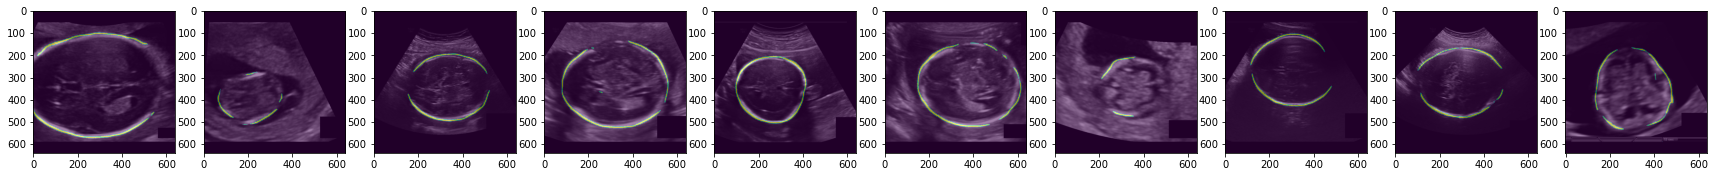

In [7]:
import matplotlib.pyplot as plt
from utils import overlay_masks
fig,ax=plt.subplots(1,np.shape(pred)[0],figsize=(30,10))
for i in range(np.shape(pred)[0]):
    im = testset[i,]
    lbl = pred[i,]
    lbl[lbl>0.5]=1
    lbl[lbl<=0.5]=0
    
    ax[i].imshow(im,cmap='gray')
    ax[i].imshow(lbl,alpha=0.5)